# Compare Coarse-Grained and Refined Contact Maps

### Import Modules

In [1]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Specify Simulations

Use `inspect_simulations.ipynb` to find matching pairs of coarse-grained and refined simulations.

In [2]:
sim_ind_cg = 9
sim_ind_refined = 33
output_dir = "/scratch/users/jwakim/chromo_two_mark_phase_transition/output/full_factorial_batch_2"
sim_cmap_file_name = "log_contact_matrix.csv"

### Load Contact Maps

In [3]:
cmap_cg = pd.read_csv(f"{output_dir}/sim_{sim_ind_cg}/{sim_cmap_file_name}", header=None).to_numpy()
cmap_refined = pd.read_csv(f"{output_dir}/sim_{sim_ind_refined}/{sim_cmap_file_name}", header=None).to_numpy()

### Resize Refined Contact Map

In [4]:
cmap_refined_resized = skimage.transform.resize(
    cmap_refined, (cmap_cg.shape[0], cmap_cg.shape[1]), anti_aliasing=True
)

In [5]:
print(f"Shape of Coarse-Grained Contact Map: {cmap_cg.shape}")
print(f"Shape of Resized Refined Contact Map: {cmap_refined_resized.shape}")

Shape of Coarse-Grained Contact Map: (5243, 5243)
Shape of Resized Refined Contact Map: (5243, 5243)


### Plot the Coarse-Grained and Refined Contact Maps

Place the coarse-grained contact map in the upper right and the refined contact map in the lower left.

In [6]:
# Coarse-grained contact map in the upper right
cmap_cg_upper = np.triu(cmap_cg)

# Erase the bottom left from the coarse-grained contact map
cmap_cg_plot = cmap_cg_upper.copy()
for i in range(len(cmap_cg_plot)):
    for j in range(i):
        cmap_cg_plot[i, j] = np.nan

# Calculate the maximum intensity from the coarse-grained contact map
cmap_cg_max_intensity = np.max(cmap_cg_upper)

# Refined contact map in the lower left
cmap_refined_lower = np.tril(cmap_refined_resized)

# Rescale the maximum intensity of the refined contact map to match that of the coarse-grained contact map
cmap_refined_rescaled = cmap_refined_lower * (cmap_cg_max_intensity / np.max(cmap_refined_lower))

# Erase the top right from the refined contact map
cmap_refined_plot = cmap_refined_rescaled.copy()
for i in range(len(cmap_refined_plot)):
    for j in range(i):
        cmap_refined_plot[j, i] = np.nan

# Calculate the Pearson correlation between the refined and coarse-grained contact maps
correlation_coefficient = np.corrcoef(cmap_refined_rescaled.flat, cmap_cg.flat)[0, 1]

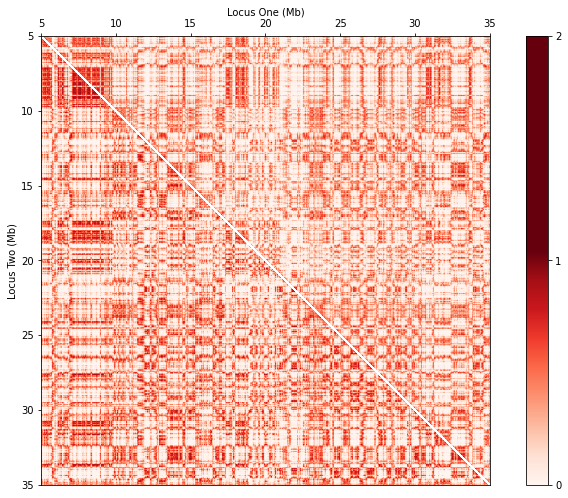

Correlation Coefficient: 0.452





In [7]:
# Plot the contact maps
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)
extents = [5, 35, 35, 5]
im = ax.imshow(cmap_cg_plot, cmap="Reds", extent=extents)
im = ax.imshow(cmap_refined_plot, cmap="Reds", extent=extents)
ax.set_xticks([5, 10, 15, 20, 25, 30, 35])
ax.set_yticks([5, 10, 15, 20, 25, 30, 35])
ticks = np.arange(np.ceil(cmap_cg_max_intensity)+1)
boundaries = np.linspace(0, np.ceil(cmap_cg_max_intensity), 1000)
ax.set_xlabel("Locus One (Mb)")
ax.set_ylabel("Locus Two (Mb)")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
fig.colorbar(im, cax=cax, orientation='vertical', ticks=ticks, boundaries=boundaries)
plt.tight_layout()
plt.show()

print(f"Correlation Coefficient: {round(correlation_coefficient, 3)}")
print("\n\n")

### Check Work

Verify that I did not just plot the same matrices twice.

In [8]:
print(cmap_cg_plot)

[[1.04139269 0.92264352 0.8642612  ... 0.49209841 0.49209841 0.10145764]
 [       nan 1.04139269 0.79679336 ... 0.45364016 0.45364016 0.10145764]
 [       nan        nan 1.04139269 ... 0.         0.         0.        ]
 ...
 [       nan        nan        nan ... 1.04139269 1.04139269 0.79679336]
 [       nan        nan        nan ...        nan 1.04139269 0.79679336]
 [       nan        nan        nan ...        nan        nan 1.04139269]]


In [9]:
print(cmap_refined_plot)

[[1.04139269        nan        nan ...        nan        nan        nan]
 [1.04139269 1.04139269        nan ...        nan        nan        nan]
 [0.99066816 0.99066816 0.97802331 ...        nan        nan        nan]
 ...
 [0.         0.         0.         ... 0.97802331        nan        nan]
 [0.         0.         0.         ... 0.83154096 0.97806195        nan]
 [0.         0.         0.         ... 0.61912841 0.96113121 1.01184607]]
